In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
def plot_output_csv(filename, output_filename, save_it_or_not):
    df = pd.read_csv(filename)
    matrix_size = df['matrix size']
    GFLOPS_s = df['GFLOPS/s']
    parallel_GFLOPs = df['parallel_GFLOP/s']

    plt.figure(figsize=(10, 6))
    plt.plot(matrix_size, GFLOPS_s, marker='o', label='GFLOPS/s')
    plt.plot(matrix_size, parallel_GFLOPs, marker='s', label='parallel_GFLOP/s')
    plt.xlabel('Matrix Size')
    plt.ylabel('GFLOPS/s')
    plt.title('Performance Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()

    if save_it_or_not:
        plt.savefig(output_filename)

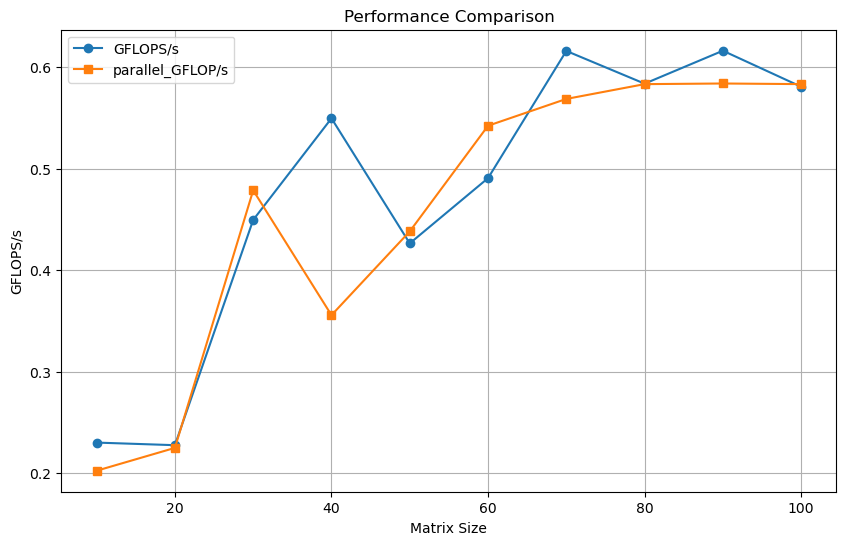

<Figure size 640x480 with 0 Axes>

In [12]:
plot_output_csv('../CSVs/MMM_output_openmp.csv', '../figures/MMM_output_openmp.png', save_it_or_not=True)